## **PDL_LAB 14: Classification of CIFAR-10 Data with Data augumentation** 

**Name: NAMBIRAJAN R S<BR>Roll NO: 215229125**

### 1. Import Libraries

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Split train and test sets

In [ ]:
(x_train,y_train), (x_test, y_test)= cifar10.load_data()

In [ ]:
print('X_train:', x_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0], 'test samples')

X_train: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Print the shape of one image (IS IT 32* 32 * 3 NUMPY ARRAY?)

In [ ]:
x_train[444].shape

(32, 32, 3)

Display one image using imshow() function

[9]


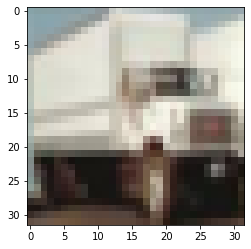

In [ ]:
print(y_train[444])
plt.imshow(x_train[444])

### 3. Convert y_train and y_test into categorical values

In [ ]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

### 4. Normalize X values by dividing it by 255

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### 5. Create the baseline model as below

In [ ]:
INPUT_SHAPE = (32,32,3)
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5),strides=(2,2),activation='relu', 
                 padding='same', input_shape=INPUT_SHAPE))
model.add(Conv2D(filters=32, kernel_size=(5,5),strides=(2,2),activation='relu', 
                 padding='same', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 4, 4, 32)          0         
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                        

### 6. Train the baseline model

In [ ]:
model.compile(optimizer=RMSprop(learning_rate=0.0005,decay=1e-6),
              loss='categorical_crossentropy',metrics=['accuracy'])

### 7. Define baseline Data Augmentation steps

In [ ]:
datagen = ImageDataGenerator(featurewise_center=False , samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False, 
                             zca_whitening=False, 
                             rotation_range=0, width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True,vertical_flip=False)

In [ ]:
datagen.fit(x_train) # this computes any statistics that may be needed (e.g for centering) from the training set

In [ ]:
# fit the model on the batches generated by datagen.flow()
model.fit_generator(datagen.flow(x_train,y_train,batch_size=32),
                    steps_per_epoch=x_train.shape[0],epochs=15,validation_data=(x_test,y_test))

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


 1562/50000 [..............................] - ETA: 32:45 - loss: 1.7494 - accuracy: 0.3605

50000/50000 [==============================] - 67s 1ms/step - loss: 1.7493 - accuracy: 0.3606 - val_loss: 1.4197 - val_accuracy: 0.4879


In [ ]:
INPUT_SHAPE = (32,32,3)
model1 = Sequential()
model1.add(Conv2D(filters=32, kernel_size=(5,5),strides=(2,2),activation='relu', 
                 padding='same', input_shape=INPUT_SHAPE))
model1.add(Conv2D(filters=32, kernel_size=(5,5),strides=(2,2),activation='relu', 
                 padding='same', input_shape=INPUT_SHAPE))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(rate=0.25))
model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(rate=0.5))
model1.add(Dense(10, activation='softmax'))

In [ ]:
model1.compile(optimizer=RMSprop(learning_rate=0.0005,decay=1e-6),
              loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model1.fit(x_train,y_train,batch_size=32,epochs=15,
                  verbose=2,validation_split=0.2,shuffle=True)

Epoch 1/15
1250/1250 - 30s - loss: 1.7200 - accuracy: 0.3702 - val_loss: 1.4355 - val_accuracy: 0.4926 - 30s/epoch - 24ms/step
Epoch 2/15
1250/1250 - 31s - loss: 1.4317 - accuracy: 0.4845 - val_loss: 1.2901 - val_accuracy: 0.5486 - 31s/epoch - 25ms/step
Epoch 3/15
1250/1250 - 32s - loss: 1.3132 - accuracy: 0.5293 - val_loss: 1.2717 - val_accuracy: 0.5590 - 32s/epoch - 26ms/step
Epoch 4/15
1250/1250 - 31s - loss: 1.2364 - accuracy: 0.5566 - val_loss: 1.1681 - val_accuracy: 0.5979 - 31s/epoch - 25ms/step
Epoch 5/15
1250/1250 - 32s - loss: 1.1909 - accuracy: 0.5788 - val_loss: 1.1411 - val_accuracy: 0.6004 - 32s/epoch - 25ms/step
Epoch 6/15
1250/1250 - 31s - loss: 1.1492 - accuracy: 0.5957 - val_loss: 1.0867 - val_accuracy: 0.6222 - 31s/epoch - 25ms/step
Epoch 7/15
1250/1250 - 31s - loss: 1.1209 - accuracy: 0.6065 - val_loss: 1.1381 - val_accuracy: 0.6143 - 31s/epoch - 25ms/step
Epoch 8/15
1250/1250 - 31s - loss: 1.0938 - accuracy: 0.6148 - val_loss: 1.0401 - val_accuracy: 0.6430 - 31s/ep

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0) # data augumentation
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.4196733236312866
Test accuracy: 0.4878999888896942


In [ ]:
score = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0354679822921753
Test accuracy: 0.6428999900817871


### 8. Answer this Question

1. How does the performance compare with the non-augmented training?
2. Experiment above with different settings of the data augmentation parameters. Can you make the model do better? Can you make it do worse?

### Ans: Without Data augumentation has better accuracy comparing non-augmented data

**Model 1**

In [ ]:
INPUT_SHAPE = (32,32,3)
model2 = Sequential()
model2.add(Conv2D(filters=64, kernel_size=(5,5),strides=(1,1),
                  activation='relu', padding='same', input_shape=INPUT_SHAPE))
model2.add(Conv2D(filters=32, kernel_size=(4,4),strides=(1,1),
                  activation='relu', padding='same', input_shape=INPUT_SHAPE))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(filters=64, kernel_size=(5,5),strides=(1,1),
                  activation='relu', padding='same', input_shape=INPUT_SHAPE))
model2.add(Conv2D(filters=32, kernel_size=(4,4),strides=(1,1),
                  activation='relu', padding='same', input_shape=INPUT_SHAPE))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(10, activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        4864      
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        32800     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        32800     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                  

In [ ]:
model2.compile(optimizer=RMSprop(learning_rate=0.0005,decay=1e-6),
              loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# fit the model on the batches generated by datagen.flow()
model2.fit_generator(datagen.flow(x_train,y_train,batch_size=32),
                     steps_per_epoch=x_train.shape[0],epochs=15,validation_data=(x_test,y_test))

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


 1563/50000 [..............................] - ETA: 5:32:30 - loss: 1.5904 - accuracy: 0.4238

50000/50000 [==============================] - 668s 13ms/step - loss: 1.5904 - accuracy: 0.4238 - val_loss: 1.2222 - val_accuracy: 0.5592


In [ ]:
history1=model2.fit(x_train,y_train,batch_size=32,epochs=5,
                  verbose=2,validation_split=0.2,shuffle=True)

Epoch 1/5
1250/1250 - 507s - loss: 1.0895 - accuracy: 0.6142 - val_loss: 1.0691 - val_accuracy: 0.6274 - 507s/epoch - 406ms/step
Epoch 2/5
1250/1250 - 500s - loss: 0.8649 - accuracy: 0.6993 - val_loss: 0.8850 - val_accuracy: 0.6898 - 500s/epoch - 400ms/step
Epoch 3/5
1250/1250 - 495s - loss: 0.7132 - accuracy: 0.7522 - val_loss: 0.8186 - val_accuracy: 0.7200 - 495s/epoch - 396ms/step
Epoch 4/5
1250/1250 - 501s - loss: 0.5972 - accuracy: 0.7944 - val_loss: 0.9004 - val_accuracy: 0.7085 - 501s/epoch - 401ms/step
Epoch 5/5
1250/1250 - 502s - loss: 0.5116 - accuracy: 0.8266 - val_loss: 0.8759 - val_accuracy: 0.7124 - 502s/epoch - 402ms/step


In [ ]:



score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9064686298370361
Test accuracy: 0.7103999853134155
